In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import spacy
import scipy
import re
from bs4 import BeautifulSoup
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
!spacy download en_core_web_sm
from spacy.lang.en.stop_words import STOP_WORDS

2023-07-17 08:41:24.830095: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 80.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [4]:
data = pd.read_excel('/content/drive/MyDrive/Punch Project/The Punch Cleaned File BackUp.xlsx')
data.head()

,URL,TITLE NAME,CLEANED DATA,TAGS
0,https://punchng.com/presidential-inauguration-...,Presidential inauguration: Obi didn’t call fo...,Presidential inauguration Obi didn t boycott p...,Politics
1,https://punchng.com/lets-reclaim-pdp-lost-glor...,"Let’s reclaim PDP lost glory, Atiku tasks par...",Let s reclaim PDP lost glory Atiku task party ...,Politics
2,https://punchng.com/tinubull-be-fair-to-all-ex...,Tinubu’ll be fair to all – Ex-lawmaker,Tinubu ll fair The National Coordinator Agenda...,Politics
3,https://punchng.com/just-in-atiku-obaseki-atte...,"JUST IN: Atiku, Obaseki attend PDP’s receptio...",JUST IN Atiku Obaseki attend PDP s reception n...,Politics
4,https://punchng.com/im-the-best-candidate-for-...,"I’m the best candidate for Senate President, ...",I m best candidate Senate President Osita Izun...,Politics


### Data Preprocessing

In [5]:
# How many duplicated data do we have?
sum(data.duplicated())

1

In [6]:
# Remove duplicated data
data.drop_duplicates(inplace=True)

In [7]:
# How many rows have null values?
columns = data.columns
for i in columns:
  print(i, "column has %d null values:" %sum(data[i].isna()))

URL column has 0 null values:
TITLE NAME column has 0 null values:
CLEANED DATA column has 0 null values:
TAGS column has 0 null values:


Split your data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data['CLEANED DATA'],data['TAGS'], test_size = 0.3)

In [9]:
X_train.head()

157    Stamp cannabis abuse trafficking THE recent di...
452    Court remand Trinity Guy minor s parent day A ...
218    NAAT kick fee hike federal university The Nati...
433    Court remand Rivers pastor allegedly defiling ...
372    Senate probe development bank Nbn loan The Sen...
Name: CLEANED DATA, dtype: object

### Data Cleaning and Preprocessing

The data is already cleaned so we will not be cleaning the data

### Data Visualization

In [10]:
text_train = ' '.join(X_train)

(-0.5, 999.5, 499.5, -0.5)

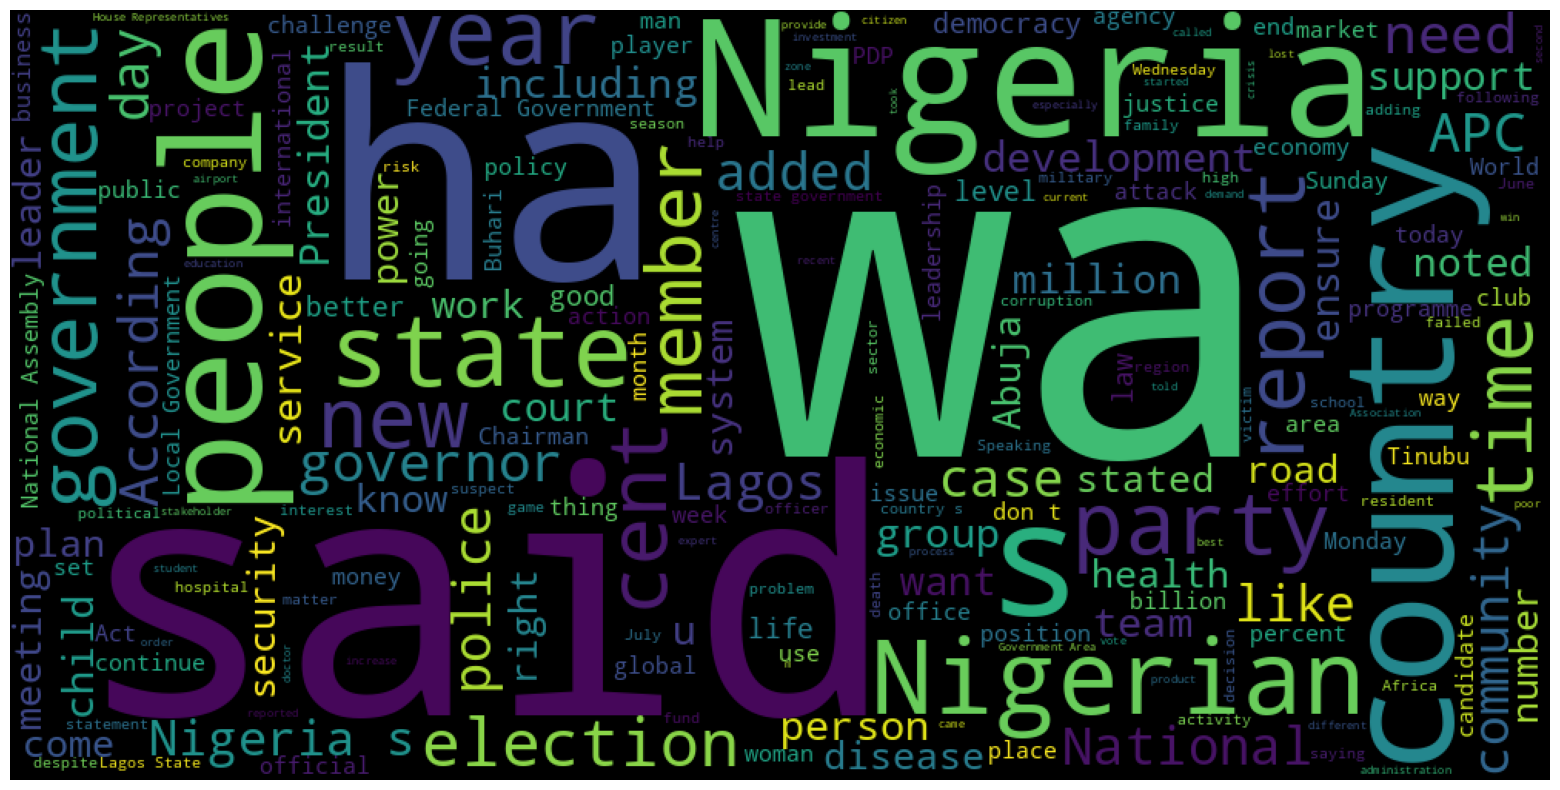

In [11]:
wordcloud2 = WordCloud(width=1000, height=500, stopwords=STOP_WORDS).generate(text_train)

plt.figure(figsize=[20,10])
plt.imshow(wordcloud2)
plt.axis('off') #to remove the axis number from showing

### Vectorization using the Term Frequency-Inverse Document Frequency Vectorizer (TF-IDF)

In [23]:
sw = list(STOP_WORDS)

vectorizer = TfidfVectorizer(stop_words=sw, max_features = 2000)

tfidf_matrix_train = vectorizer.fit_transform(X_train)
tfidf_matrix_test = vectorizer.transform(X_test)

tfidf_matrix_train.toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
tfidfcounts = pd.DataFrame(tfidf_matrix_train.toarray(),index = X_train.index, columns = vectorizer.get_feature_names_out())
tfidfcounts.columns

Index(['abandoned', 'abass', 'abbas', 'abducted', 'abdullahi', 'abia',
       'ability', 'abiodun', 'able', 'abroad',
       ...
       'yes', 'yobe', 'young', 'youth', 'yusuf', 'zamfara', 'zero', 'zone',
       'zoned', 'zoning'],
      dtype='object', length=2000)

In [25]:
X_train = scipy.sparse.csr_matrix.todense(tfidf_matrix_train)
X_test  = scipy.sparse.csr_matrix.todense(tfidf_matrix_test)

X_train

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
print(y_train.unique())

['General Health' 'Politics' 'Business' 'Sport' 'Editorial' 'News'
 'Metro Plus']


In [27]:
# Change the target variables to numerical labels
y_train = LabelEncoder().fit_transform(y_train)
y_test = LabelEncoder().fit_transform(y_test)

y_train

array([2, 2, 5, 0, 6, 5, 1, 1, 5, 5, 0, 6, 0, 4, 3, 4, 1, 4, 5, 5, 3, 5,
       0, 1, 2, 2, 6, 4, 1, 3, 2, 6, 2, 6, 4, 6, 3, 2, 5, 4, 0, 2, 4, 3,
       6, 2, 5, 3, 6, 1, 0, 4, 1, 6, 3, 5, 3, 1, 2, 0, 6, 4, 4, 0, 2, 3,
       1, 2, 3, 6, 1, 5, 3, 4, 5, 6, 0, 1, 6, 2, 4, 1, 3, 4, 4, 6, 3, 0,
       6, 5, 0, 0, 1, 5, 6, 3, 3, 4, 4, 1, 4, 5, 5, 0, 0, 5, 5, 0, 5, 0,
       0, 3, 6, 4, 3, 0, 5, 2, 1, 3, 0, 6, 0, 0, 2, 3, 3, 1, 2, 5, 5, 3,
       0, 5, 3, 3, 3, 4, 5, 3, 1, 6, 3, 1, 0, 1, 5, 4, 5, 4, 4, 5, 6, 6,
       6, 5, 3, 4, 0, 5, 1, 6, 2, 1, 4, 0, 2, 0, 1, 5, 2, 4, 2, 0, 1, 0,
       0, 3, 1, 1, 4, 0, 2, 0, 3, 5, 4, 0, 5, 2, 1, 6, 0, 5, 1, 4, 2, 3,
       6, 2, 2, 4, 1, 0, 3, 3, 0, 5, 0, 1, 0, 3, 4, 0, 5, 6, 1, 1, 2, 6,
       6, 0, 5, 3, 2, 2, 6, 1, 3, 5, 2, 5, 2, 3, 3, 1, 4, 4, 5, 0, 4, 2,
       0, 2, 3, 2, 6, 5, 5, 5, 4, 6, 2, 0, 3, 5, 2, 2, 0, 5, 0, 4, 1, 5,
       4, 5, 5, 0, 6, 2, 2, 2, 5, 0, 4, 3, 6, 2, 6, 5, 5, 5, 3, 2, 2, 5,
       3, 1, 6, 1, 3, 1, 1, 4, 2, 2, 5, 0, 2, 5, 2,

### Build the model

In [38]:
model = keras.Sequential([
    layers.Dense(48, input_shape=(2000,), activation = "relu"),

    layers.Dropout(0.3),

    layers.Dense(24, activation = "relu"),

    layers.Dropout(0.2),

    layers.Dense(7, activation = "softmax")
])
model.compile(
optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [39]:
neuraln = model.fit(X_train, y_train, epochs= 50, validation_data = (X_test, y_test))

Epoch 1/50
13/13 [==============================] - 5s 21ms/step - loss: 1.9349 - accuracy: 0.2157 - val_loss: 1.9222 - val_accuracy: 0.2557
Epoch 2/50
13/13 [==============================] - 0s 8ms/step - loss: 1.8941 - accuracy: 0.2868 - val_loss: 1.8770 - val_accuracy: 0.3239
Epoch 3/50
13/13 [==============================] - 0s 8ms/step - loss: 1.8228 - accuracy: 0.3922 - val_loss: 1.8039 - val_accuracy: 0.3750
Epoch 4/50
13/13 [==============================] - 0s 9ms/step - loss: 1.7128 - accuracy: 0.4534 - val_loss: 1.7054 - val_accuracy: 0.4375
Epoch 5/50
13/13 [==============================] - 0s 8ms/step - loss: 1.5972 - accuracy: 0.5490 - val_loss: 1.5789 - val_accuracy: 0.6307
Epoch 6/50
13/13 [==============================] - 0s 8ms/step - loss: 1.4385 - accuracy: 0.6054 - val_loss: 1.4332 - val_accuracy: 0.7216
Epoch 7/50
13/13 [==============================] - 0s 7ms/step - loss: 1.2860 - accuracy: 0.6912 - val_loss: 1.2778 - val_accuracy: 0.8125
Epoch 8/50
13/13 [=

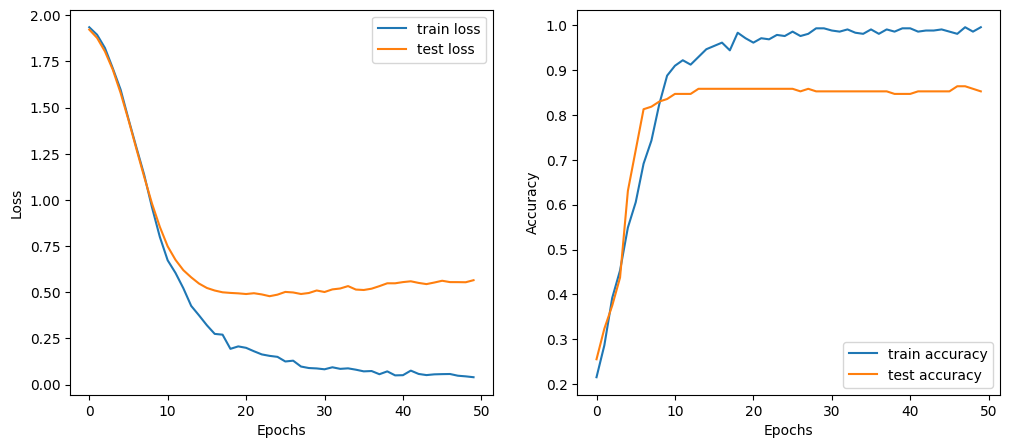

In [45]:
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(neuraln.history['loss'])
plt.plot(neuraln.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['train loss', 'test loss'])

ax = plt.subplot(122)
plt.plot(neuraln.history['accuracy'])
plt.plot(neuraln.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['train accuracy', 'test accuracy'])

### Save Model

In [43]:
from keras.models import Model

In [49]:
# Save the model
model.save('/content/drive/MyDrive/Punch Project/model.h5')